In [211]:
#EXPLORATORY DATA ANALYSIS WITH TITANIC DATASET
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# explaination
given data - passenger id, survived in the collision, passenger class, name, sex, age,count of siblings or spouse on board, 
 parent or child onboard, ticket, fare, cabin, embarkment.

In [212]:
#data impporting saved in same folder
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# explaination
finding the missing or null values in the dataset - part of EDA. 
using heatmap from seaborn to find the missing data.

("self.isnull()")is used to denote the null value as true.

In [213]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# explaination

sns - seaborn library
heatmap - type of graph
x values - null values
y values = 0-890 which cant be shown completely here, so yticklabels = False
side bar (shows the transition of colorwith respect to values) = False - the notation here refers to true or false, so its either at the top or bottom color

<AxesSubplot:>

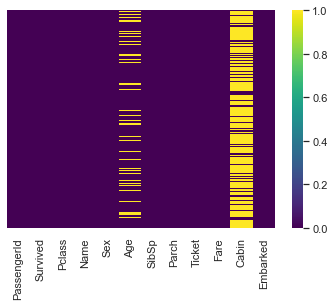

In [214]:
sns.heatmap(train.isnull() ,yticklabels = False, cbar= True ,cmap='viridis')

# explaination
it shows that 20+% ofage is missing and 80+% of cabin data is missing so we can guess or fill it with mean age, but not fill cabin data.

plotinga counter plot to view survival rate 
0=died, 1=alive

using seaborn counterplot its done
plot styles "white", "dark", "whitegrid", "darkgrid", "ticks"

500+died, 300+ survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

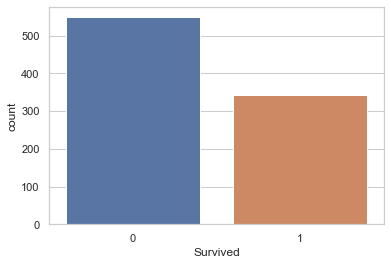

In [215]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',data = train)

# explaination
same ploting but differentiated with male and female in the survival plot.
palette is the shading definer.
hue = diff the data with given parameters.

<AxesSubplot:xlabel='Survived', ylabel='count'>

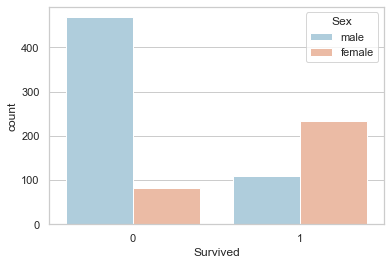

In [216]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue='Sex', data = train, palette='RdBu_r')

# explaination
same ploting but differentiated with people who used money to get a boat.
palette is the shading definer.
hue = diff the data with given parameters.passenger class - 3rd class cant offer money.

<AxesSubplot:xlabel='Survived', ylabel='count'>

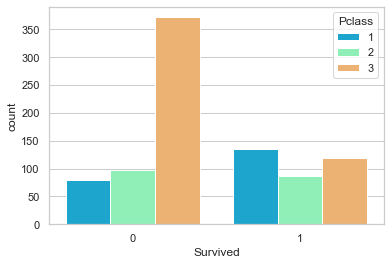

In [217]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue='Pclass', data = train, palette='rainbow')

# explaination
distribution of age that were in the boat. distplot is histogram plot.
na values is droped out of plotting with "self.dropna()"
color is the shading definer.eg - lightblue, dark blue, blue, cyan, red, etc
kden - kernal density used to create probability density function.the line on the plot is kde
bins - size of the box or definer of the x axis 0-5 or 0 -2
other functions 

histplot(data, x, y, hue, weights, stat, bins, binwidth, binrange, discrete, cumulative, common_bins, common_norm, multiple, element, fill, shrink, kde, kde_kws, line_kws, thresh, pthresh, pmax, cbar, cbar_ax, cbar_kws, palette, hue_order, hue_norm, color, log_scale, legend, ax, **kwargs)

<AxesSubplot:xlabel='Age', ylabel='Count'>

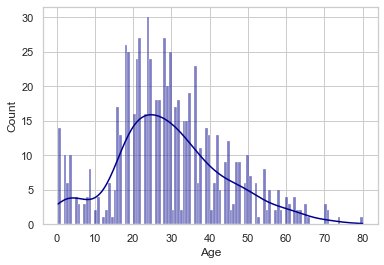

In [218]:
sns.histplot(train['Age'].dropna(),kde = True, color='darkblue', bins=110)

# explaination
using bins at 60

<AxesSubplot:xlabel='Age', ylabel='Count'>

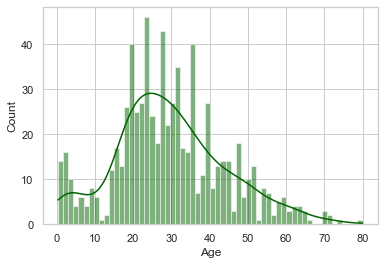

In [219]:
sns.histplot(train['Age'].dropna(),kde = True, color='darkgreen', bins=60)

# explaination
using matplotlib for plotting
alpha = shader density (0-1)

<AxesSubplot:>

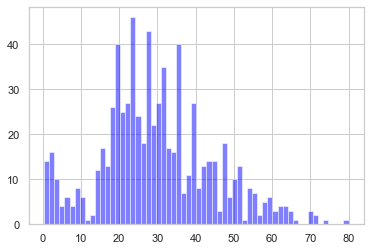

In [220]:
train['Age'].hist(bins=60,color='blue',alpha=.5) 


seeing the count on siblings, 0 = no sibiling or spouse

<AxesSubplot:xlabel='SibSp', ylabel='count'>

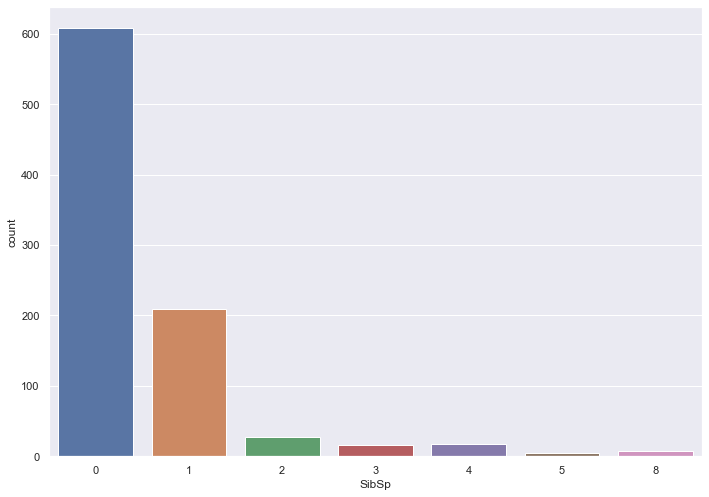

In [221]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #used to increase figure size permanently or can use
#plt.figure(figsize=(12,7))
sns.countplot(data=train, x="SibSp") #ploting 

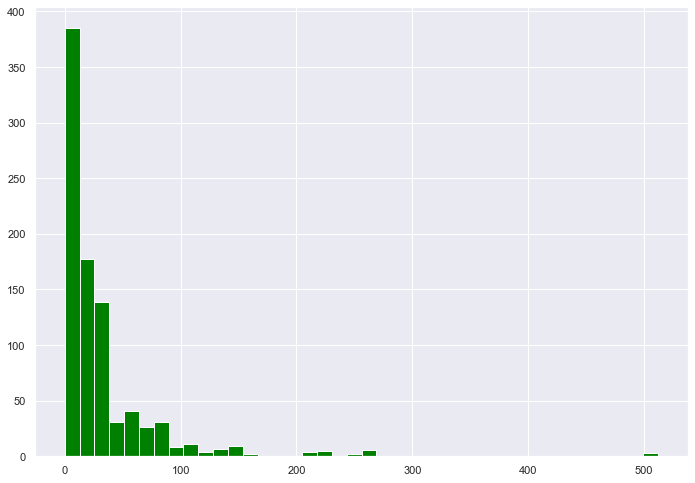

In [222]:
#creating a histogram onfair
train['Fare'].hist(color='green', bins=40) #with matplotlib

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

#sns.histplot(data=train,x='Fare', bins=40,color= "green") #with seaborn

Cufflinks Python
Cufflink is also a python library that connects plotly with pandas 
so that we can create charts directly on data frames. 
It basically acts as a plugin.

In [223]:
#pip install cufflinks
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist',bins=30,color='green')

Data cleaning
removing nan values with mean and removing other values.
first we check the average agesso we can guess all the other ages

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

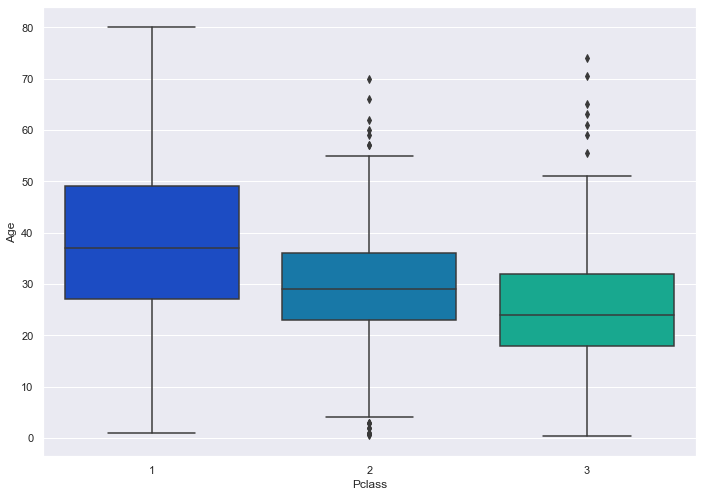

In [224]:
sns.boxplot(x='Pclass',y='Age',data = train, palette= 'winter')

there is a relation between passenger class and age of the passenger. 
the aged group mostly travelled in each class is given. so the average age people of first class is around 37 , 38.
similarly we can see 2nd class = 29 and 3rd class = 24.

In [225]:
#defining a class 
def new_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass== 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [226]:
#applying the new_age function


train['Age'] = train[['Age','Pclass']].apply(new_age,axis = 1)

#When the axis is set to zero while performing a specific action,
#the action is performed on rows that satisfy the condition.

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

typesof color map or cmap

<AxesSubplot:>

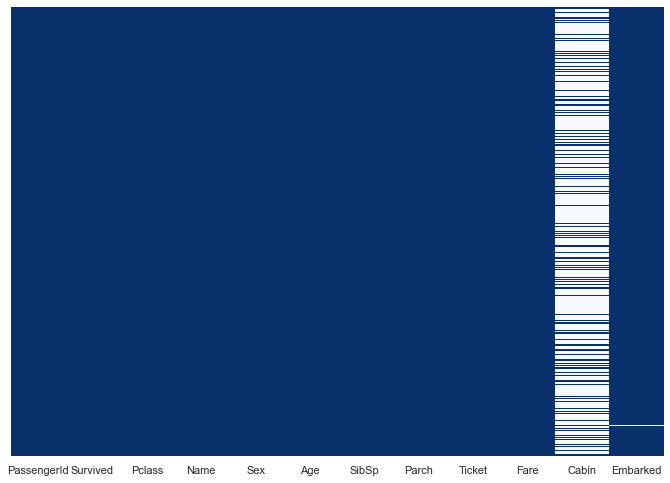

In [227]:
#checking the heat map

sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='Blues_r')

In [228]:
#more cabin data missing and it cant be guessed and it will reduce the accuracy. so its dropped

train.drop('Cabin', axis=1, inplace =True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

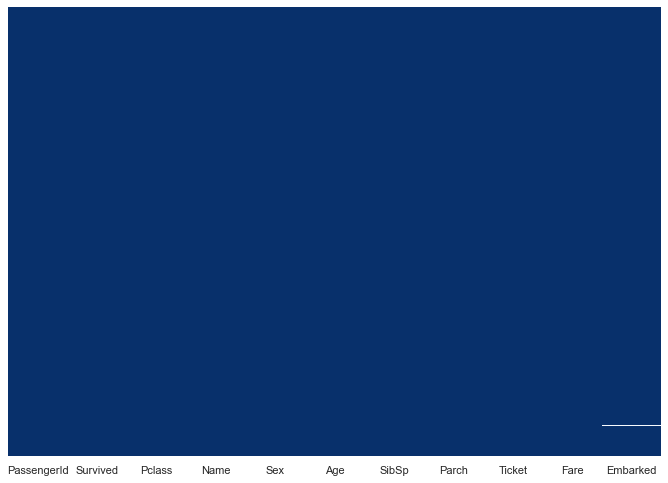

In [229]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='Blues_r')

In [230]:
 train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [231]:
#changing the values of embarked and sex to 0,1 for prediction. get_dummies is a function to convert a type into 0,1,2,etc.

pd.get_dummies(train['Embarked'],drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [232]:
sex=pd.get_dummies(train['Sex'],drop_first = True)
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [233]:
#we dont need string values, hence it cant be used to plot any 

train.drop(['Sex', 'Embarked', 'Name', 'Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [236]:
#adding the new sex and embark columns

train = pd.concat([train,sex,embark],axis=1)
train.head()

#this is the data after cleaning and now we can start the analysis part

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Logistic Regression analysis

building a model by splitting the train and test data

In [237]:
train.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [238]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [248]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),
                                                 train['Survived'],test_size = 0.30, random_state=10)

## Training and predicting



In [277]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( max_iter=1000) # max_iter =1000 is only for lbfgs failed to converge (status=1):STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
model.fit(X_train,y_train )

LogisticRegression(max_iter=1000)

In [278]:
predictions = model.predict(X_test)

In [279]:
from sklearn.metrics import confusion_matrix

accuracy = confusion_matrix(y_test,predictions)

accuracy

array([[151,  23],
       [ 27,  67]], dtype=int64)

In [280]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,predictions)
accuracy

0.8134328358208955

In [281]:
predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)